<a href="https://colab.research.google.com/github/mojoyinkimberly/Star_Classification/blob/main/Star_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

**reading dataset into  python environment**

In [115]:
star_dataset =pd.read_csv("/content/star_classification.csv", sep =",")
star_dataset

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


**renaming columns**

In [116]:
renamed_star=star_dataset.rename(columns={'u':'ultraviolet_filter','g':'green_filter','r':'red_filter','i':'near_infrared_filter','z':'infrared_filter','run_ID':'run_number','rerun_ID':'rerun_number','cam_col':'camera_column','plate':'plate_id','MJD':'modified_julian_date'})
renamed_star

,obj_ID,alpha,delta,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,infrared_filter,run_number,rerun_number,camera_column,field_ID,spec_obj_ID,class,redshift,plate_id,modified_julian_date,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


**checking for missing values**

In [117]:
renamed_star.isna().sum()

obj_ID                  0
alpha                   0
delta                   0
ultraviolet_filter      0
green_filter            0
red_filter              0
near_infrared_filter    0
infrared_filter         0
run_number              0
rerun_number            0
camera_column           0
field_ID                0
spec_obj_ID             0
class                   0
redshift                0
plate_id                0
modified_julian_date    0
fiber_ID                0
dtype: int64

**loop plotting boxplots to check for outliers**

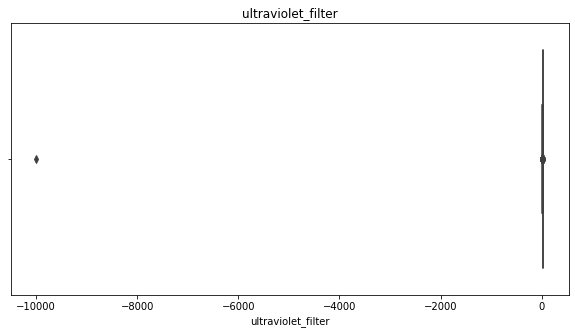

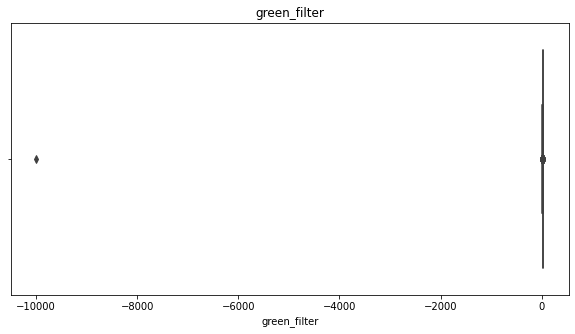

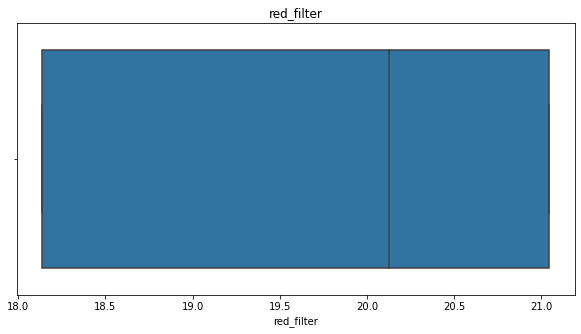

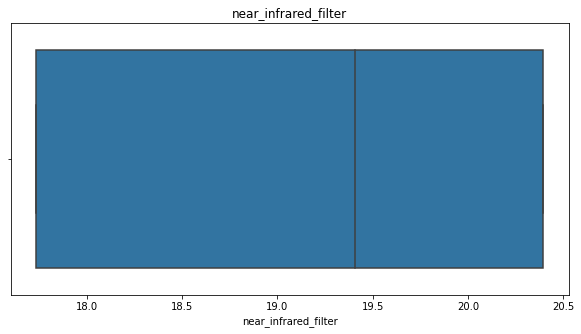

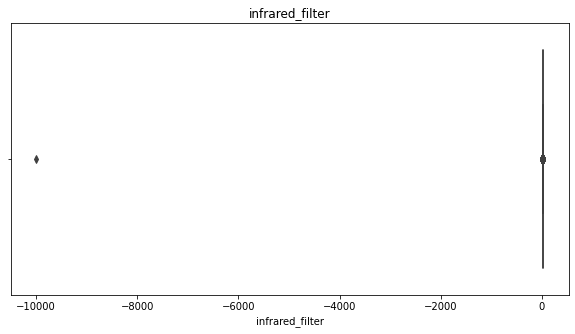

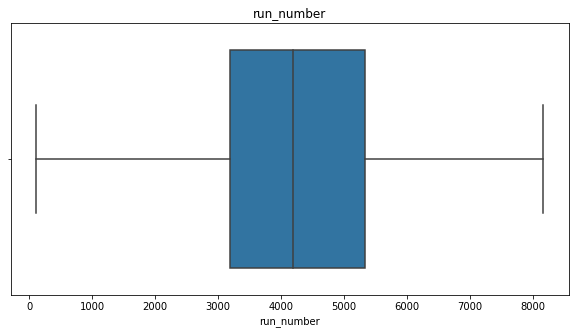

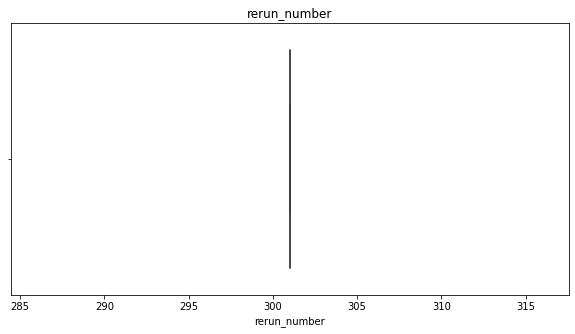

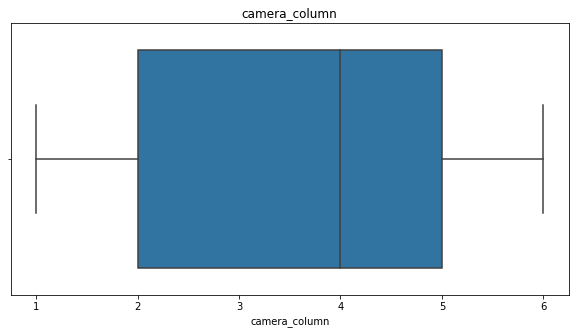

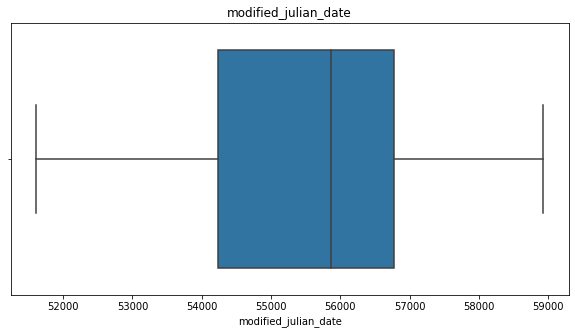

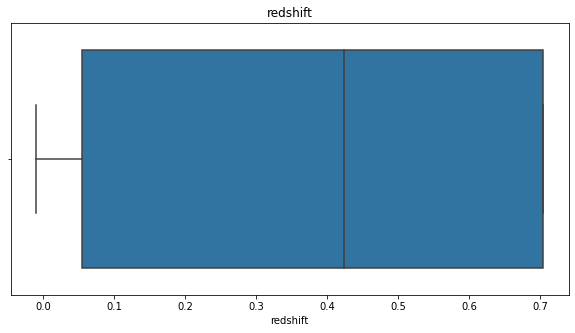

In [151]:
for column in ['ultraviolet_filter', 'green_filter', 'red_filter', 'near_infrared_filter', 'infrared_filter', 'run_number', 'rerun_number', 'camera_column', 'modified_julian_date', 'redshift']:
  plt.figure(figsize=(10, 5))
  sns.boxplot(data = renamed_star, x = column)
  plt.title(column)
  plt.show()

In [119]:
# for column in ['ultraviolet_filter', 'green_filter', 'red_filter', 'near_infrared_filter', 'infrared_filter', 'run_number', 'rerun_number', 'camera_column', 'modified_julian_date', 'redshift']:
#   plt.figure(figsize=(10, 5))
#   sns.histplot(data = renamed_star, x = column, kde="line")
#   plt.title(column)
#   plt.show()

In [120]:
renamed_star.describe()

,obj_ID,alpha,delta,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,infrared_filter,run_number,rerun_number,camera_column,field_ID,spec_obj_ID,redshift,plate_id,modified_julian_date,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [121]:
renamed_star['red_filter'] = np.where(renamed_star['red_filter'] > 21.044785, 21.044785, renamed_star['red_filter'])
renamed_star['red_filter'] = np.where(renamed_star['red_filter'] < 18.135828, 18.135828, renamed_star['red_filter'])
renamed_star['near_infrared_filter'] = np.where(renamed_star['near_infrared_filter'] > 20.396495, 20.396495, renamed_star['near_infrared_filter'])
renamed_star['near_infrared_filter'] = np.where(renamed_star['near_infrared_filter'] < 17.732285, 17.732285, renamed_star['near_infrared_filter'])
renamed_star['redshift'] = np.where(renamed_star['redshift'] > 0.704154, 0.704154, renamed_star['redshift'])

In [122]:
new_star=renamed_star.drop(columns =['obj_ID','spec_obj_ID','plate_id','fiber_ID'])

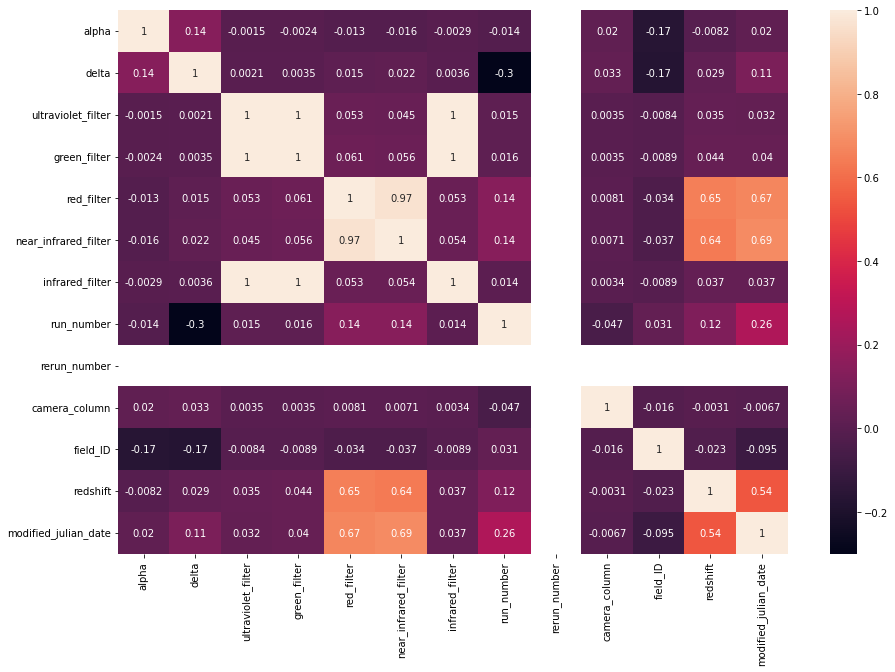

In [123]:
plt.figure(figsize=(15, 10))
sns.heatmap(new_star.corr(), annot = True)

In [124]:
encode = OrdinalEncoder()
new_star[['class1', 'fee']] = encode.fit_transform(new_star[['class','field_ID']])
new_star

,alpha,delta,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,infrared_filter,run_number,rerun_number,camera_column,field_ID,class,redshift,modified_julian_date,class1,fee
0,135.689107,32.494632,23.87882,22.27530,20.395010,19.165730,18.79371,3606,301,2,79,GALAXY,0.634794,56354,0.0,68.0
1,144.826101,31.274185,24.77759,22.83188,21.044785,20.396495,21.61427,4518,301,5,119,GALAXY,0.704154,58158,0.0,108.0
2,142.188790,35.582444,25.26307,22.66389,20.609760,19.348570,18.94827,3606,301,2,120,GALAXY,0.644195,55592,0.0,109.0
3,338.741038,-0.402828,22.13682,23.77656,21.044785,20.396495,19.25010,4192,301,3,214,GALAXY,0.704154,58039,0.0,203.0
4,345.282593,21.183866,19.43718,17.58028,18.135828,17.732285,15.54461,8102,301,3,137,GALAXY,0.116123,56187,0.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.044785,20.396495,20.73569,7778,301,2,581,GALAXY,0.000000,57749,0.0,570.0
99996,29.493819,19.798874,22.69118,22.38628,20.450030,19.757590,19.41526,7917,301,1,289,GALAXY,0.404895,56934,0.0,278.0
99997,224.587407,15.700707,21.16916,19.26997,18.204280,17.732285,17.35221,5314,301,4,308,GALAXY,0.143366,54535,0.0,297.0
99998,212.268621,46.660365,25.35039,21.63757,19.913860,19.072540,18.62482,3650,301,4,131,GALAXY,0.455040,56368,0.0,120.0


In [125]:
new_star1 = new_star.drop(['class','field_ID','fee'], axis =1)

In [126]:
y = new_star1['class1']
x = new_star1.drop(['class1','green_filter','red_filter','infrared_filter'], axis =1) 

In [127]:
def calcu_mult(df):
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return vif

In [128]:
calcu_mult(x)

,variables,VIF
0,alpha,1.021693
1,delta,1.179716
2,ultraviolet_filter,1.002183
3,near_infrared_filter,2.360713
4,run_number,1.229259
5,rerun_number,1366.363377
6,camera_column,1.003189
7,redshift,1.747042
8,modified_julian_date,2.156428


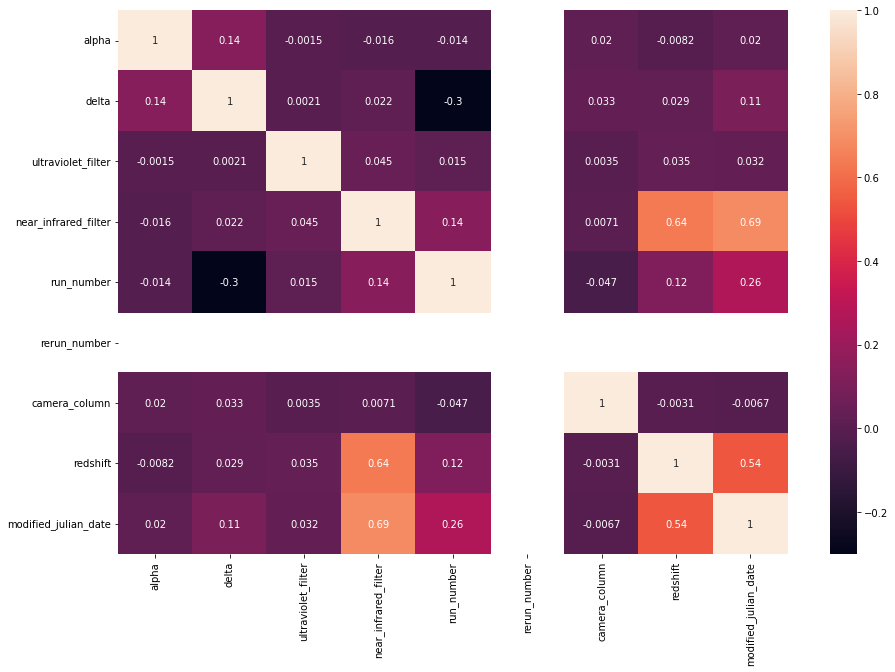

In [129]:
plt.figure(figsize=(15, 10))
sns.heatmap(x.corr(), annot = True)

In [88]:
y.value_counts()

0.0    59445
2.0    21594
1.0    18961
Name: class1, dtype: int64

In [89]:
sample = SMOTE(random_state = 45)
x, y = sample.fit_resample(x, y)

In [90]:
y.value_counts()

0.0    59445
1.0    59445
2.0    59445
Name: class1, dtype: int64

In [91]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state= 45)

In [92]:
normalizer = StandardScaler()
normed = pd.DataFrame(normalizer.fit_transform(X_train))
normed

,0,1,2,3,4,5,6,7,8
0,1.735190,-0.636732,-0.109215,0.433019,1.673918,0.0,-0.287565,1.100219,0.282668
1,0.838831,0.274102,0.178879,-0.059884,-1.083349,0.0,0.356167,-1.157426,1.561338
2,1.425352,-0.882923,0.504107,1.048941,1.672397,0.0,0.999899,-1.155202,1.480901
3,0.556373,0.141631,0.265152,0.294484,0.020471,0.0,-0.287565,0.758284,-0.027430
4,-0.000480,1.480390,-0.211574,-0.293860,-0.836929,0.0,-1.575028,-1.156475,0.940032
...,...,...,...,...,...,...,...,...,...
142663,0.353836,1.603215,-0.419788,-1.494614,-0.632086,0.0,-0.931297,-0.819656,-1.694416
142664,-1.323479,-1.661592,-0.265974,-1.428690,-1.737427,0.0,-1.575028,-1.156435,-0.485644
142665,0.728868,-0.691312,0.273039,-0.091286,0.104639,0.0,-0.931297,0.961586,-0.157794
142666,0.077233,1.566812,-0.093116,0.513150,-0.392765,0.0,0.356167,1.100219,0.382521


In [93]:
X_train_, X_test_val,y_train_,y_test_val = train_test_split(normed,y_train,test_size=.25, random_state =1)

In [94]:
pca = PCA(n_components=9)
pca_model = pca.fit(X_train_)
PCA(n_components = 9)

PCA(n_components=9)

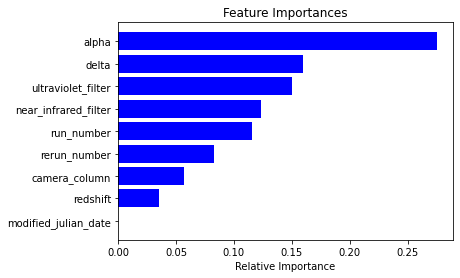

In [95]:
features = x.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [96]:
l_model = LogisticRegression()
l_output = l_model.fit(X_train_,y_train_)

In [97]:
l_output.score(X_train_,y_train_)

0.9238324875468453

In [148]:
y_predict = l_output.predict(X_test_val)
# y_prob = l_output.predict_prob(X_test_val)

In [ ]:
confusion_matrix(y_test_val, y_predict)

In [ ]:
print(classification_report(y_test_val, y_predict))

In [ ]:
Cv_ = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
score = cross_val_score(l_output, X_test_val, y_test_val, scoring = "accuracy", cv = Cv_, n_jobs=1, error_score="raise")
np.mean(score)

In [ ]:
r_model = RandomForestClassifier(max_depth=2, random_state=42, criterion='gini')
r_output = r_model.fit(X_train_,y_train_)

In [130]:
r_output.score(X_train_,y_train_)

0.8586929094120616

In [131]:
y_predict_ = r_output.predict(X_test_val)

In [132]:
confusion_matrix(y_test_val, y_predict_)

array([[ 9171,  2578,   105],
       [ 2498,  9456,     0],
       [    0,     0, 11859]])

In [133]:
print(classification_report(y_test_val, y_predict_))

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78     11854
         1.0       0.79      0.79      0.79     11954
         2.0       0.99      1.00      1.00     11859

    accuracy                           0.85     35667
   macro avg       0.85      0.85      0.85     35667
weighted avg       0.85      0.85      0.85     35667



In [134]:
svm = SVC(kernel="rbf", degree =3, random_state = 42)
svm_output = svm.fit(X_train_,y_train_)

In [111]:
svm_output.score(X_train_,y_train_)

0.941822973617069

In [145]:
y_predict1 = svm_output.predict(X_test_val)

In [149]:
confusion_matrix(y_test_val, y_predict1)

array([[10658,   957,   239],
       [  993, 10956,     5],
       [    0,     0, 11859]])

In [150]:
print(classification_report(y_test_val, y_predict1))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91     11854
         1.0       0.92      0.92      0.92     11954
         2.0       0.98      1.00      0.99     11859

    accuracy                           0.94     35667
   macro avg       0.94      0.94      0.94     35667
weighted avg       0.94      0.94      0.94     35667



In [ ]:
from sklearn.metrics import roc_curve

fpr = {}
tpr = {}
thrash = {}
n_class = 3

for i in range(n_class):
  fpr[i], tpr[i], thrash[i] = roc_curve(y_test, y_prob[:, i], pos_label = i) 

plt.plot(fpr[0], tpr[0], linestyle="--", color="orange", label="Class 0 vs Rest")
plt.plot(fpr[1], tpr[1], linestyle="--", color="blue", label="Class 1 vs Rest")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label="Class 2 vs Rest")
plt.title("Multiclass ROC curve")
plt.xlabel("False_Positive_rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.savefig("Multiclass ROC", dpi=300)

In [ ]:
from sklearn.metrics import auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predict1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predict1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])